# **Brain Stroke Analysis**

## **Introduction**

This is data analysis of **brain_stroke** dataset. Source of dataset: https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset 

Importing needed modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Preparation and Cleaning**

Reading data from file using .read_csv() method

In [21]:
unprepared_df = pd.read_csv('e:/data/brain_stroke.csv')

Taking look at the data in tabular format

In [4]:
unprepared_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


Getting the list of columns in the data frame

In [6]:
unprepared_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Selecting only needed columns

In [24]:
selected_columns = ['age', 'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status', 'stroke']

In [25]:
df = unprepared_df[selected_columns].copy()
df

,age,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,67.0,Private,Urban,228.69,formerly smoked,1
1,80.0,Private,Rural,105.92,never smoked,1
2,49.0,Private,Urban,171.23,smokes,1
3,79.0,Self-employed,Rural,174.12,never smoked,1
4,81.0,Private,Urban,186.21,formerly smoked,1
...,...,...,...,...,...,...
4976,41.0,Private,Rural,70.15,formerly smoked,0
4977,40.0,Private,Urban,191.15,smokes,0
4978,45.0,Govt_job,Rural,95.02,smokes,0
4979,40.0,Private,Rural,83.94,smokes,0


## **Asking and Answering Questions**

### Question 1: Is smoking cause brain stroke?

Getting table with number of brain stroke cases of each type of smoking to figure out if it causes desease using .groupby() method

In [9]:
smokers_cases = df.groupby('smoking_status')[['stroke']].sum().sort_values(by='stroke', ascending=False)
smokers_cases

,stroke
smoking_status,
never smoked,89
formerly smoked,70
Unknown,47
smokes,42


Visualization of given data via pandas built-in .plot() method

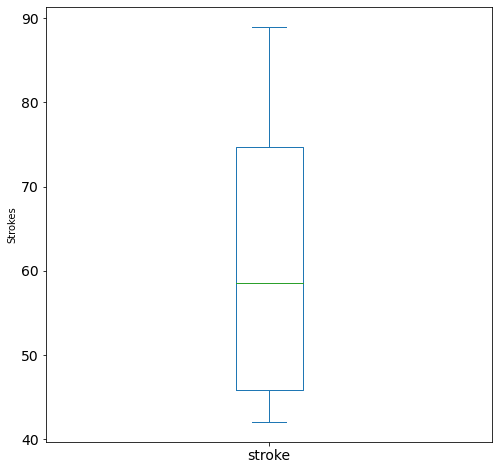

In [10]:
smokers_cases.plot(kind='box', figsize=(8, 8), xlabel='Smoking Status', ylabel='Strokes', fontsize=14);

#### Answer 1: Most of people who got brain stroke never smoked, so smoking status don't affect on it.

### Question 2: What is average, min and max age of people who got brain stroke?

Getting all ages of people who got brain stroke by .loc method, then getting additional information using .describe() method and selecting needed values (average, min, max)

In [11]:
ages_cases = df.loc[df.stroke == 1]['age'].describe()[['mean', 'min', 'max']]
ages_cases

mean    67.819839
min      1.320000
max     82.000000
Name: age, dtype: float64

Visualization of ages of people who had brain stroke and who not

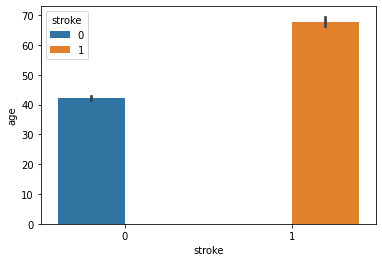

In [12]:
sns.barplot(x='stroke', y='age', hue='stroke', data=df);

#### Answer 2: Average age of people who got brain stroke is 67.8, min age its 1.3 and max is 82 years old.

### Question 3: Which Residence have more brain stroke cases?

Getting numbers of cases in each residence type using .groupby() and .sum() method

In [13]:
residences_cases = df.groupby('Residence_type')[['stroke']].sum()
residences_cases

,stroke
Residence_type,
Rural,113
Urban,135


#### Answer 3: Number of brain stroke cases bigger in Urban residence.

### Question 4: Is glucose level affect brain stroke?

Visualization of glucose level of all people using Matplotlib

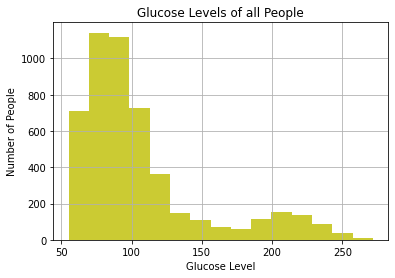

In [14]:
plt.hist(df['avg_glucose_level'], bins=15, facecolor='y', alpha=0.8)
plt.title('Glucose Levels of all People')
plt.grid(True)
plt.ylabel('Number of People')
plt.xlabel('Glucose Level')
plt.show()

Getting Number of cases of people who have glucose level higher than 100 and who have less than 100 using .loc and .sum() methods

In [15]:
high_glucose_level_cases = df.loc[df['avg_glucose_level'] > 100 ]['stroke'].sum()
low_glucose_level_cases = df.loc[df['avg_glucose_level'] < 100 ]['stroke'].sum()
high_glucose_level_cases, low_glucose_level_cases

(136, 112)

Testing if people with higher glucose level have more cases than people with low glucose level

In [16]:
high_glucose_level_cases > low_glucose_level_cases

True

#### Answer 4: People with high glucose level got brain stroke more often, so it affect on disease.

### Question 5: People with which work type got more brain stroke cases?

Using .groupby() and .sum() methods to get number of cases of each work type

In [17]:
work_types_cases = df.groupby('work_type')[['stroke']].sum()
work_types_cases

,stroke
work_type,
Govt_job,33
Private,148
Self-employed,65
children,2


Visualization of that data

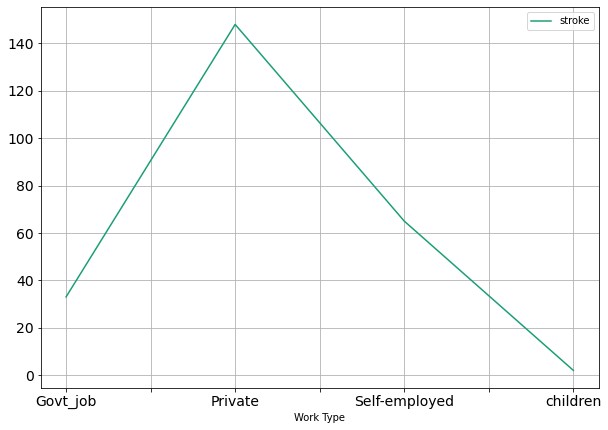

In [18]:
work_types_cases.plot(kind='line', xlabel='Work Type', colormap='Dark2', figsize=(10, 7), fontsize=14, grid=True);

#### Answer 5: People with Private work type got more disease cases.

## Inferences and Conclusions

#### Infences:

- Smoking don't cause brain stroke.

- Average age of people who gets brain stroke is 67 years, but even kids can have this desease.

- People who live in Urban residence have more brain stroke cases than thoso who live in Rural.

- People with high glucose level gets rain stroke more often.

- Most of people who got brain stroke had private work type.